In [1]:
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from tqdm import tqdm
import time, timeit

import procedure_lib_notebook as proclib

In [2]:
ideal = proclib.Procedure(L=3, N_cycles=25, hx=1.1)
xyz = proclib.Procedure(L=2, N_cycles=25, remake_product_state_LSQ=True)

data = ideal.run_with_mesolve()

#data = xyz.run_with_sesolve()

  0%|          | 0/25 [00:00<?, ?it/s]

mesolve:   0%|          | 0/1 [00:00<?, ?it/s]

eigens:   0%|          | 0/501 [00:00<?, ?it/s]

mesolve:   0%|          | 0/1 [00:00<?, ?it/s]

eigens:   0%|          | 0/501 [00:00<?, ?it/s]

mesolve:   0%|          | 0/1 [00:00<?, ?it/s]

eigens:   0%|          | 0/501 [00:00<?, ?it/s]

mesolve:   0%|          | 0/1 [00:00<?, ?it/s]

eigens:   0%|          | 0/501 [00:00<?, ?it/s]

mesolve:   0%|          | 0/1 [00:00<?, ?it/s]

eigens:   0%|          | 0/501 [00:00<?, ?it/s]

mesolve:   0%|          | 0/1 [00:00<?, ?it/s]

eigens:   0%|          | 0/501 [00:00<?, ?it/s]

mesolve:   0%|          | 0/1 [00:00<?, ?it/s]

eigens:   0%|          | 0/501 [00:00<?, ?it/s]

mesolve:   0%|          | 0/1 [00:00<?, ?it/s]

eigens:   0%|          | 0/501 [00:00<?, ?it/s]

mesolve:   0%|          | 0/1 [00:00<?, ?it/s]

eigens:   0%|          | 0/501 [00:00<?, ?it/s]

mesolve:   0%|          | 0/1 [00:00<?, ?it/s]

eigens:   0%|          | 0/501 [00:00<?, ?it/s]

mesolve:   0%|          | 0/1 [00:00<?, ?it/s]

eigens:   0%|          | 0/501 [00:00<?, ?it/s]

mesolve:   0%|          | 0/1 [00:00<?, ?it/s]

eigens:   0%|          | 0/501 [00:00<?, ?it/s]

mesolve:   0%|          | 0/1 [00:00<?, ?it/s]

eigens:   0%|          | 0/501 [00:00<?, ?it/s]

mesolve:   0%|          | 0/1 [00:00<?, ?it/s]

eigens:   0%|          | 0/501 [00:00<?, ?it/s]

mesolve:   0%|          | 0/1 [00:00<?, ?it/s]

eigens:   0%|          | 0/501 [00:00<?, ?it/s]

mesolve:   0%|          | 0/1 [00:00<?, ?it/s]

eigens:   0%|          | 0/501 [00:00<?, ?it/s]

mesolve:   0%|          | 0/1 [00:00<?, ?it/s]

eigens:   0%|          | 0/501 [00:00<?, ?it/s]

mesolve:   0%|          | 0/1 [00:00<?, ?it/s]

eigens:   0%|          | 0/501 [00:00<?, ?it/s]

mesolve:   0%|          | 0/1 [00:00<?, ?it/s]

eigens:   0%|          | 0/501 [00:00<?, ?it/s]

mesolve:   0%|          | 0/1 [00:00<?, ?it/s]

eigens:   0%|          | 0/501 [00:00<?, ?it/s]

mesolve:   0%|          | 0/1 [00:00<?, ?it/s]

eigens:   0%|          | 0/501 [00:00<?, ?it/s]

mesolve:   0%|          | 0/1 [00:00<?, ?it/s]

eigens:   0%|          | 0/501 [00:00<?, ?it/s]

mesolve:   0%|          | 0/1 [00:00<?, ?it/s]

eigens:   0%|          | 0/501 [00:00<?, ?it/s]

mesolve:   0%|          | 0/1 [00:00<?, ?it/s]

eigens:   0%|          | 0/501 [00:00<?, ?it/s]

mesolve:   0%|          | 0/1 [00:00<?, ?it/s]

eigens:   0%|          | 0/501 [00:00<?, ?it/s]

In [3]:
def innerproduct(a,b):
    prod = a.dag() * b
    if type(prod) is complex:
        return np.abs(prod)**2
    else:
        return np.abs((a*(b*b.dag())).tr())

In [4]:
eigen = data[1]
state = data[0]

N_cycles = len(eigen)
N_per_cycle = len(eigen[0])
N_states = len(eigen[0][0][1])

energies_for_cycle, states_for_cycle, dotproducts= [], [], []
temp1, temp2, temp3 = [], [], []
for i in range(len(eigen)):
    for j in range(len(eigen[i])):
        temp1.append(eigen[i][j][0])
        temp2.append(eigen[i][j][1])
        
        temp33 = []
        for k in range(len(eigen[i][j][1])):
            temp33.append(innerproduct(state[i][j], eigen[i][j][1][k]))
            
        temp3.append(temp33)
        
energies_for_cycle.append(temp1)
states_for_cycle.append(temp2)
dotproducts.append(temp3)
    
energies_for_cycle = np.array(energies_for_cycle)
states_for_cycle = np.array(states_for_cycle)
dotproducts = np.array(dotproducts)

print(energies_for_cycle.shape)
print(dotproducts.shape)

(1, 12525, 64)
(1, 12525, 64)


In [5]:
def index_to_statename(n):
    if n == 0: return "Ground state"
    elif n == 1: return "1st excited state"
    elif n == 2: return "2nd excited state"
    elif n == 3: return "3rd excited state"
    else: return f"{n}th excited state"

In [6]:
def plot_wide_line(xdata, ydata, width):
    ydata = np.array(ydata)
    width = np.array(width)
    plt.fill_between(xdata, ydata-width/2, ydata+width/2)

In [7]:
energy = energies_for_cycle[0,:,:]
states = states_for_cycle[0,:,:]
dotproducts = dotproducts[0,:,:]

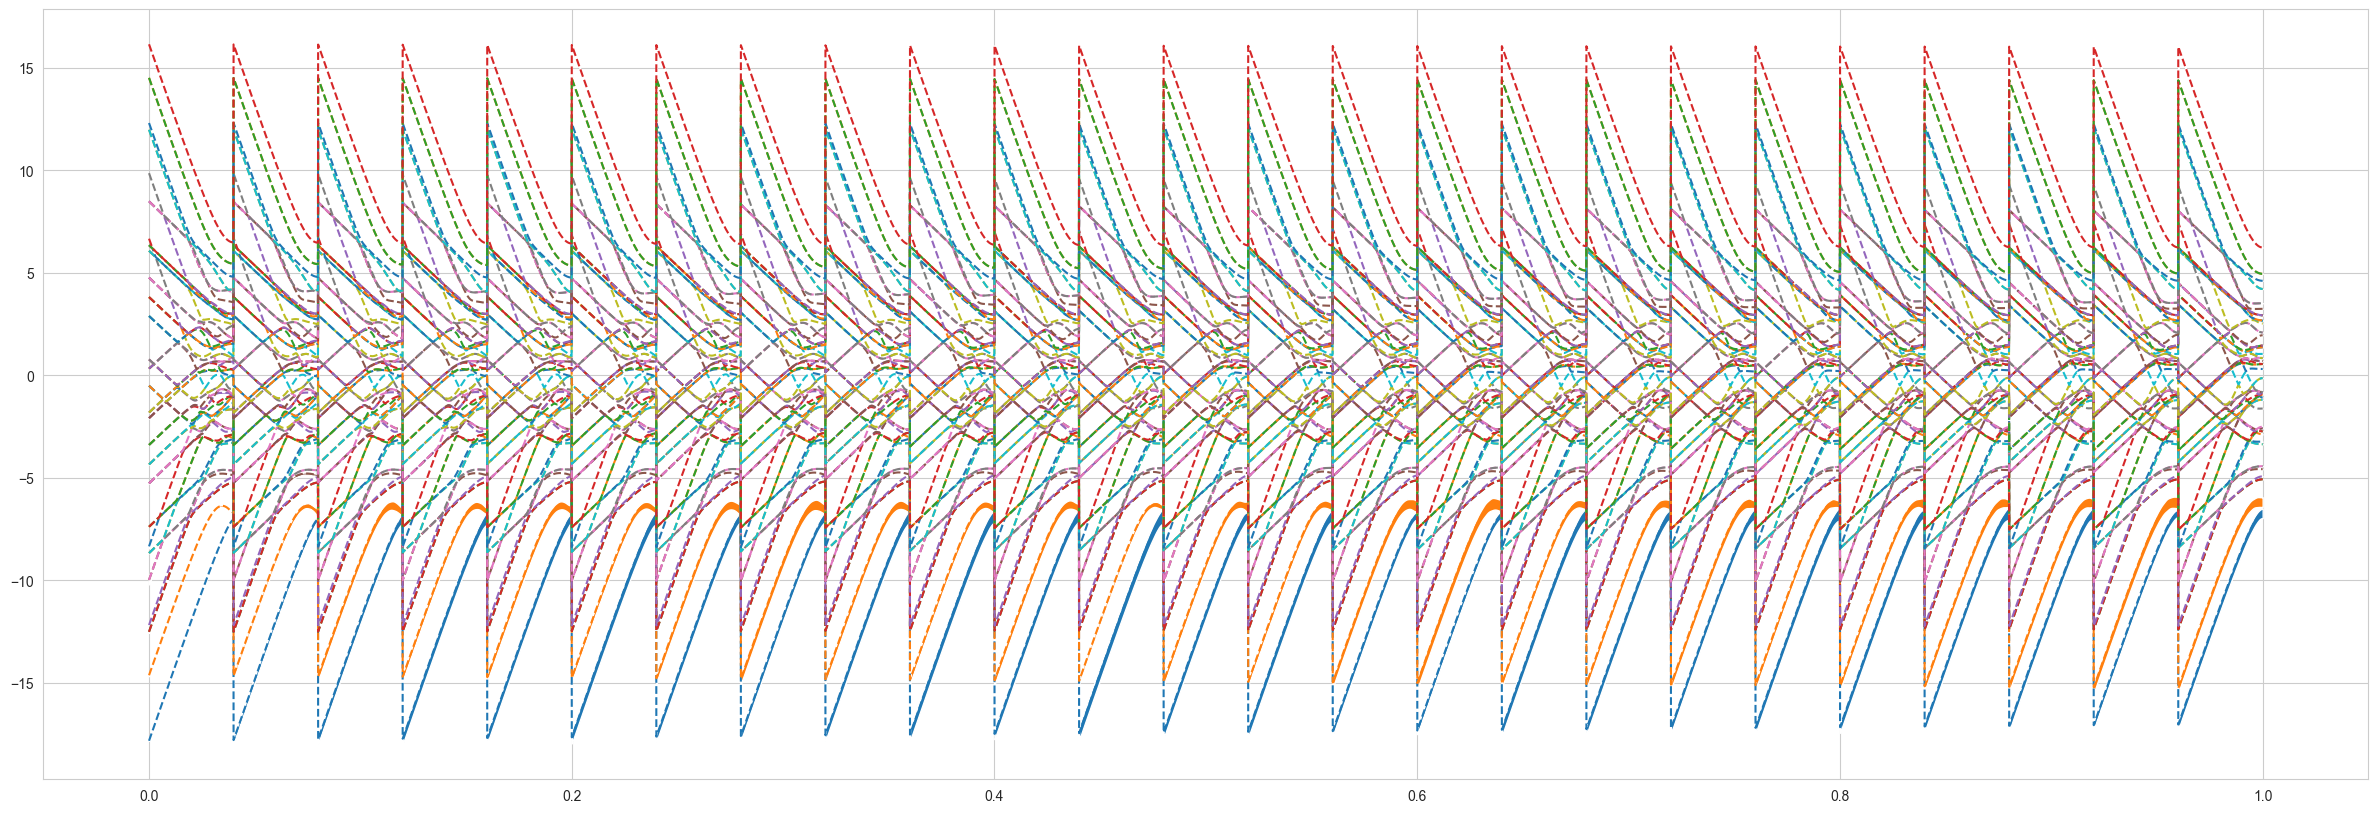

In [8]:


plt.figure(figsize = (30,10))

for i in range(len(energy[0,:])):
    ts = np.linspace(0,1,len(energy[:,i]))
    plot_wide_line(ts, energy[:,i], dotproducts[:,i])
    plt.plot(ts,energy[:,i], label = index_to_statename(i), linestyle = "--")
    

    



In [9]:
#prepare for animation 


energy_n = np.zeros((N_cycles, N_states, N_per_cycle), dtype=float)
states_n = np.zeros((N_cycles, N_states, N_per_cycle), dtype=qt.Qobj)
dotproducts_n = np.zeros((N_cycles, N_states, N_per_cycle), dtype=float)


for i in range(N_cycles):
    for j in range(N_states):
        energy_n[i,j,:] = energy[i*N_per_cycle:(i+1)*N_per_cycle, j]
        states_n[i,j,:] = states[i*N_per_cycle:(i+1)*N_per_cycle, j]
        dotproducts_n[i,j,:] = dotproducts[i*N_per_cycle:(i+1)*N_per_cycle, j]

energy = energy_n
states = states_n
dotproducts = dotproducts_n


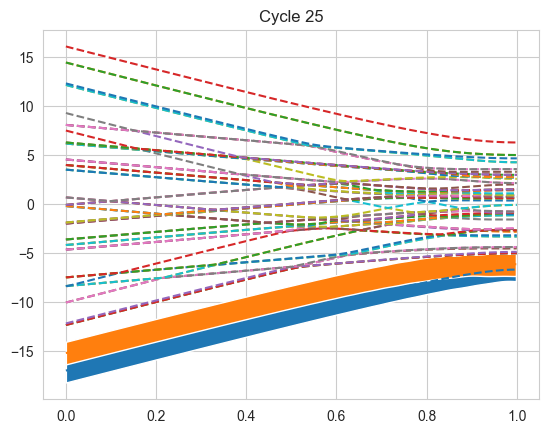

In [10]:
from matplotlib import animation

fig, ax = plt.subplots(1,1)

ts = np.linspace(0,1,N_per_cycle)
basegraphs = []
slidinggraphs = []
for i in range(N_states):
    xdata = ts[0:0]
    ydata = np.array(energy[0, i, 0:0])
    width = np.array(dotproducts[0, i, 0:0])
    slidinggraphs.append(ax.fill_between(xdata, ydata-width/2, ydata+width/2))

    basegraphs.append(ax.plot(ts,energy[0,i,:], label = index_to_statename(i), linestyle = "--"))

ax.set_title("Cycle 1")
ax.set_ylabel("Energy")
ax.set_xlabel("Time during single cycle")

dt = 10
dts = []
t0 = 0

def animate(n):

    global dt, t0, dts
    dt = time.time()-t0
    dts.append(dt)
    if len(dts) > 10:
        dts = dts[-10: -1]
    t0 = time.time()

    global slidinggraphs, basegraphs

    I = n % N_per_cycle
    cycle = n // N_per_cycle

    ax.clear()
    ax.set_title(f"Cycle {cycle + 1}")

    basegraphs = []
    slidinggraphs = []
    for i in range(N_states):

        basegraphs.append(ax.plot(ts,energy[cycle,i,:], label = index_to_statename(i), linestyle = "--"))

    


    for i in range(N_states):
        xdata = ts[0:I]
        ydata = np.array(energy[cycle, i, 0:I])
        width = np.array(dotproducts[cycle, i, 0:I])*5
        slidinggraphs.append(ax.fill_between(xdata, ydata-width/2, ydata+width/2))

    space = "                                                      "
    space = space + space
    print(f"{n} \ {N_cycles * N_per_cycle}: time:{np.average(dts) * (N_cycles * N_per_cycle-n) / 60 : 0.2f}min" + space, end = "\r")

    
N_frames = N_cycles * N_per_cycle
#N_frames = 60
anim=animation.FuncAnimation(fig,animate,repeat=False,blit=False,frames=N_frames,
                             interval=100)

anim.save("ideal_spectre.mp4",writer=animation.FFMpegWriter(fps=60))
plt.show() 